LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm # type: ignore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 


c:\Users\Equipo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.stats import gaussian_kde


## CARGA DEL DATASET

In [ ]:
ruta = ".\Personalidad.csv"
datos = pd.read_csv(ruta, encoding = 'utf-8')
datos.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4,No,4,6,No,13,5,1
1,9,Yes,0,0,Yes,0,3,0
2,9,Yes,1,2,Yes,5,2,0
3,0,No,6,7,No,14,8,1
4,3,No,9,4,No,8,5,1


In [3]:
datos.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality
count,2776.000000,2776.000000,2776.000000,2776.000000,2776.000000,2776.00000
mean,4.497478,3.947406,2.998919,6.227666,3.554035,0.51549
std,3.444697,2.871313,2.224272,4.242306,2.892295,0.49985
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,2.000000,1.000000,3.000000,1.000000,0.00000
50%,4.000000,3.000000,3.000000,5.000000,3.000000,1.00000
75%,7.000000,6.000000,5.000000,10.000000,6.000000,1.00000
max,11.000000,10.000000,7.000000,15.000000,10.000000,1.00000


Como ya estoy usando un dataset que limpie y explore voy a saltear estos pocesos y me voy a enfocar en aplicar los modelos.

## Acondicionamiento de los datos

In [4]:
datos_encoded = datos.copy()

In [5]:
datos_encoded = pd.get_dummies(datos_encoded, columns=['Stage_fear', 'Drained_after_socializing'])
datos_encoded.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,4,4,6,13,5,1,True,False,True,False
1,9,0,0,0,3,0,False,True,False,True
2,9,1,2,5,2,0,False,True,False,True
3,0,6,7,14,8,1,True,False,True,False
4,3,9,4,8,5,1,True,False,True,False


In [6]:
datos_encoded = datos_encoded.astype(int)

In [7]:
datos_encoded["Personality"] = pd.to_numeric(datos_encoded["Personality"], errors="coerce")
datos_encoded.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Personality,Stage_fear_No,Stage_fear_Yes,Drained_after_socializing_No,Drained_after_socializing_Yes
0,4,4,6,13,5,1,1,0,1,0
1,9,0,0,0,3,0,0,1,0,1
2,9,1,2,5,2,0,0,1,0,1
3,0,6,7,14,8,1,1,0,1,0
4,3,9,4,8,5,1,1,0,1,0


In [8]:
datos_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2776 entries, 0 to 2775
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Time_spent_Alone               2776 non-null   int64
 1   Social_event_attendance        2776 non-null   int64
 2   Going_outside                  2776 non-null   int64
 3   Friends_circle_size            2776 non-null   int64
 4   Post_frequency                 2776 non-null   int64
 5   Personality                    2776 non-null   int64
 6   Stage_fear_No                  2776 non-null   int64
 7   Stage_fear_Yes                 2776 non-null   int64
 8   Drained_after_socializing_No   2776 non-null   int64
 9   Drained_after_socializing_Yes  2776 non-null   int64
dtypes: int64(10)
memory usage: 217.0 KB


## Tratamiento de variables no numericas

In [9]:
y = datos_encoded["Personality"]
X = datos_encoded.drop(["Drained_after_socializing_Yes", "Stage_fear_No", "Stage_fear_Yes", "Personality"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #Si incremento el random_state mejora 

In [10]:
print('La forma de X_train es: ', X_train.shape)
print('La forma de y_train es: ', y_train.shape)
print('La forma de X_test es: ', X_test.shape)
print('La forma de y_test es: ', y_test.shape)

La forma de X_train es:  (1943, 6)
La forma de y_train es:  (1943,)
La forma de X_test es:  (833, 6)
La forma de y_test es:  (833,)


## Declaración del modelo y entrenamiento

In [11]:
clasificador = LogisticRegression(random_state=0)
clasificador.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Predicion (testeo)

In [12]:
y_pred = clasificador.predict(X_test)

Metricas

In [13]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

print("Metricas de la clasificación")
print(classification_report(y_test, y_pred))

Matriz de confusión:
[[386  19]
 [ 31 397]]
Metricas de la clasificación
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       405
           1       0.95      0.93      0.94       428

    accuracy                           0.94       833
   macro avg       0.94      0.94      0.94       833
weighted avg       0.94      0.94      0.94       833



Text(0.5, 427.9555555555555, 'Predicted label')

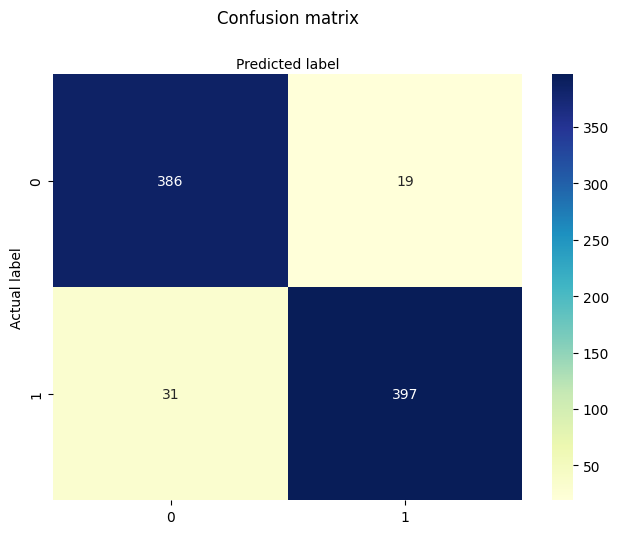

In [14]:
class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


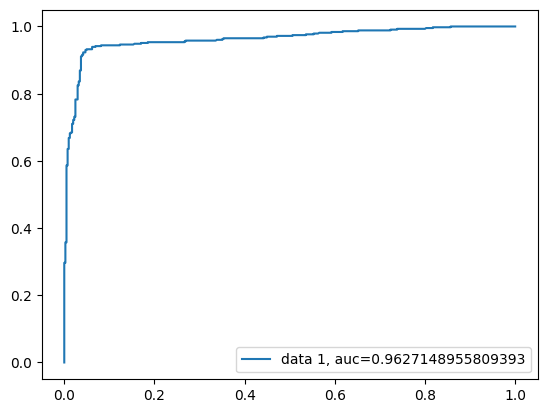

In [15]:
y_pred_proba = clasificador.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Metricas de las variables independientes

In [16]:
#Añade una columna de unos para que el modelo incluya un término independiente o intercepto (β₀) en la regresión logística
X_constant = sm.add_constant(X)
print("Columnas:", X_constant.shape[1])
#Calcula cuantas columnas son linealmente independientes.
print("Rango de la matriz:", np.linalg.matrix_rank(X_constant))

Columnas: 7
Rango de la matriz: 7


In [17]:
#Esto muestra una matriz de correlación entre todas las variables predictoras
#pd.DataFrame(X_constant).corr()
pd.DataFrame(X_constant.drop(columns='const')).corr()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Drained_after_socializing_No
Time_spent_Alone,1.000000,-0.718125,-0.736835,-0.700808,-0.718477,-0.850790
Social_event_attendance,-0.718125,1.000000,0.732326,0.717090,0.727339,0.849930
Going_outside,-0.736835,0.732326,1.000000,0.718338,0.755739,0.872637
Friends_circle_size,-0.700808,0.717090,0.718338,1.000000,0.688410,0.822904
Post_frequency,-0.718477,0.727339,0.755739,0.688410,1.000000,0.842849
Drained_after_socializing_No,-0.850790,0.849930,0.872637,0.822904,0.842849,1.000000


Realizo un mapa de clor para poder observar mejor las correlaciones entre las variables

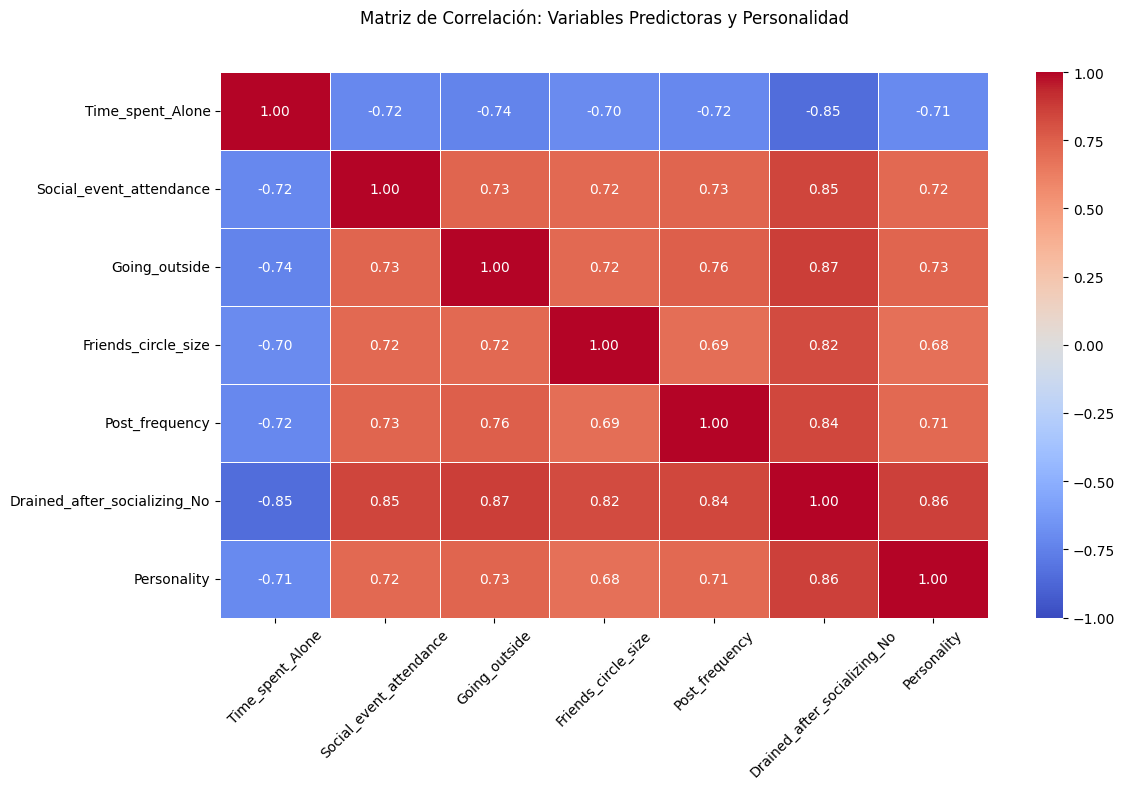

In [18]:
# 1. Preparar los datos (incluyendo Y)
df_corr = pd.concat([X, y], axis=1)

# 2. Calcular matriz de correlación
corr_matrix = df_corr.corr()

# 3. Mapa de calor básico
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            vmin=-1, 
            vmax=1,
            linewidths=0.5)
plt.title("Matriz de Correlación: Variables Predictoras y Personalidad\n", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Calculo los valores estadistico  para las variables independientes

La verosimilitud (likelihood) es una medida de qué tan bien se ajusta el modelo a los datos observados. El objetivo de la regresión logística es encontrar los parámetros del modelo que maximicen esta verosimilitud, lo que se conoce como estimación de máxima verosimilitud. 

El Current function value es el valor de la función de pérdida cuando utiliza los parámetros encontrados por su ajuste

"Iterations 8: El algoritmo necesitó 8 iteraciones para converger" significa que el algoritmo iterativo utilizado para ajustar el modelo de regresión logística requirió ocho pasos o iteraciones para alcanzar una solución estable. En cada iteración, el algoritmo ajusta los coeficientes del modelo para intentar maximizar la probabilidad de observar los datos de entrenamiento. La convergencia ocurre cuando los cambios en estos coeficientes se vuelven insignificantes entre iteraciones, lo que indica que el modelo ha llegado a una solución razonablemente buena. 

Pseudo R² es el porcentaje que explica variabilidad en términos de verosimilitud.

El log-likelihood (log-verosimilitud) es una función que mide la probabilidad de observar los datos dados los parámetros del modelo.

El LLR p-value  es un valor que indica la significancia estadística del modelo en su conjunto.

El intercepto (const) en tu modelo de regresión logística representa la probabilidad base de ser extrovertido cuando todas las variables independientes son cero, pero hay varios matices.

El coef es el cambio en el logaritmo de odds (log-odds) por cada unidad de cambio en la variable predictora.

Interpretación:

Positivo: Aumenta la probabilidad de ser extrovertido
Negativo: Disminuye la probabilidad

El std err es la precisión de la estimación del coeficiente (variabilidad esperada si repitiéramos el estudio).

Interpretación:

Menor valor → Mayor precisión
Mayor valor → Menor precisión

El estadistico z es el úmero de desviaciones estándar que el coeficiente está alejado de cero.

Fórmula: z = coef / std err

Interpretación:

|z| > 2 → Generalmente significativo (p < 0.05)
Valores extremos (|z| > 3) → Efectos muy significativos

El P>|z| es la probabilidad de observar un efecto tan extremo si no hubiera relación real (H₀: β=0).

Interpretación:

p < 0.05 → Efecto estadísticamente significativo
p ≥ 0.05 → No significativo
p < 0.001 → Muy significativo

[0.025 - 0.975] (Intervalo de Confianza 95%)
Qué es: Rango donde está el verdadero coeficiente (en la población) con 95% de confianza.

Interpretación:

No incluye 0 → Significativo (concuerda con p < 0.05)
Amplitud → Precisión (más estrecho = más preciso)

In [19]:
modelo = sm.Logit(y, X_constant)
resultado = modelo.fit()
print(resultado.summary())

Optimization terminated successfully.
         Current function value: 0.230408
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            Personality   No. Observations:                 2776
Model:                          Logit   Df Residuals:                     2769
Method:                           MLE   Df Model:                            6
Date:                Sat, 12 Jul 2025   Pseudo R-squ.:                  0.6674
Time:                        14:52:19   Log-Likelihood:                -639.61
converged:                       True   LL-Null:                       -1922.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.0775      0.396     -7.763      0.000

logit: Es el vector de predicciones sin procesar (no normalizadas) que genera un modelo de clasificación, que, por lo general, se pasa a una función de normalización. Si el modelo resuelve un problema de clasificación multiclase, los logits suelen convertirse en una entrada para la función softmax.

Softmax: Es una función que determina las probabilidades para cada clase posible en un modelo de clasificación de varias clases. Las probabilidades suman exactamente 1.0.

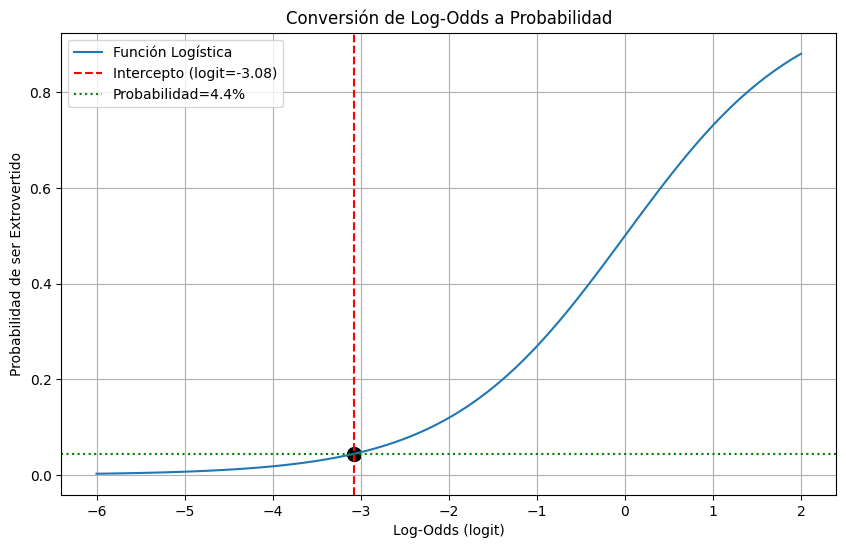

In [20]:
# Función logística
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Rango de valores alrededor del intercepto
x = np.linspace(-6, 2, 100)
y = logistic(x)

# Punto del intercepto
intercept_prob = logistic(-3.0775)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Función Logística')
plt.axvline(x=-3.0775, color='red', linestyle='--', label=f'Intercepto (logit={-3.0775:.2f})')
plt.axhline(y=intercept_prob, color='green', linestyle=':', label=f'Probabilidad={intercept_prob:.1%}')
plt.scatter(-3.0775, intercept_prob, color='black', s=100)
plt.xlabel('Log-Odds (logit)')
plt.ylabel('Probabilidad de ser Extrovertido')
plt.title('Conversión de Log-Odds a Probabilidad')
plt.legend()
plt.grid(True)
plt.show()

## Gráfica de la función de perdida  

C:\Users\Equipo\AppData\Local\Temp\ipykernel_21136\1547108883.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  paramentro_rango = np.linspace(resultado.params[parametro_indice]-2, resultado.params[parametro_indice]+2,100)
C:\Users\Equipo\AppData\Local\Temp\ipykernel_21136\1547108883.py:8: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  parametros[parametro_indice] = val


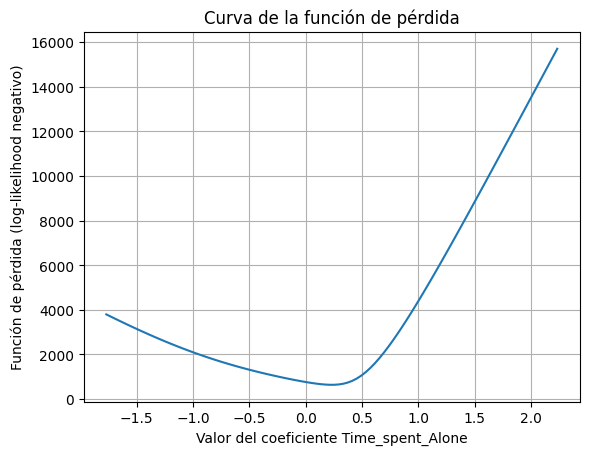

In [21]:
parametro_indice = 1
paramentro_rango = np.linspace(resultado.params[parametro_indice]-2, resultado.params[parametro_indice]+2,100)

perdida_valores = []

for val in paramentro_rango:
    parametros = resultado.params.copy()
    parametros[parametro_indice] = val
    
    peridida = -modelo.loglike(parametros)
    perdida_valores.append(peridida)

plt.plot(paramentro_rango, perdida_valores)
plt.xlabel(f'Valor del coeficiente {X_constant.columns[parametro_indice]}')
plt.ylabel('Función de pérdida (log-likelihood negativo)')
plt.title('Curva de la función de pérdida')
plt.grid(True)
plt.show()